In [1]:
import pandas as pd
path = r'D:\DataSet\digit_recognizer\train.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [5]:
x.shape

(42000, 784)

In [6]:
y.shape

(42000,)

In [7]:
#方差过滤
from sklearn.feature_selection import VarianceThreshold
selector =VarianceThreshold() #实例化，不填参数阈值默认为0
x_var0 = selector.fit_transform(x)
x_var0.shape

(42000, 708)

In [8]:
pd.DataFrame(x_var0).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 如果想消除一半的特征呢？
x.var().values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00, 1.60530842e+00, 9.29377602e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [13]:
# 去除一半相关性较差的特征
import numpy as np
med = np.median(x.var().values)

In [14]:
x_fsvar = VarianceThreshold(med).fit_transform(x)
x_fsvar.shape

(42000, 392)

In [17]:
#相关性过滤--卡方过滤
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#假设我们需要300个特征
x_fschi = SelectKBest(chi2,k=300).fit_transform(x_fsvar,y)

In [18]:
x_fschi.shape

(42000, 300)

In [19]:
x_fschi

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  74, 250,  59]], dtype=int64)

In [20]:
x_fschi_ = pd.DataFrame(x_fschi)
x_fschi_.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,18,30,137,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,25,130,155,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#采用随机森林模型与交叉验证
cross_val_score(RFC(n_estimators=10, random_state=0),x_fschi,y,cv=5).mean()

0.9344761904761905

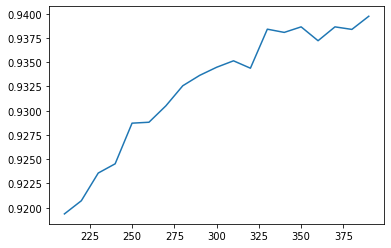

In [39]:
#如何选择一个最优的超参数k呢？
#第一种方法：参数曲线
%matplotlib inline
import matplotlib.pyplot as plt

score = []
for i in range(390,200,-10):
    x_fschi = SelectKBest(chi2,k=i).fit_transform(x_fsvar,y)
    once = cross_val_score(RFC(n_estimators=10, random_state=0),x_fschi,y,cv=5).mean()
    score.append(once)
x_inx = range(390,200,-10)
plt.plot(x_inx,score)
plt.show()

In [30]:
#第二种方法：通过p值来求合适的k值
chivalue, pvalues_chi = chi2(x_fsvar,y)
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()

In [31]:
k

392

In [32]:
x_fschi = SelectKBest(chi2,k).fit_transform(x_fsvar,y)

In [33]:
#采用随机森林模型与交叉验证
cross_val_score(RFC(n_estimators=10, random_state=0),x_fschi,y,cv=5).mean()

0.9390476190476191

In [41]:
#互信息法
from sklearn.feature_selection import mutual_info_classif as MIC

In [42]:
result = MIC(x_fsvar,y)
result

array([0.0674398 , 0.08748132, 0.10058758, 0.11569784, 0.11557048,
       0.10351283, 0.08851475, 0.05171194, 0.07205891, 0.09508694,
       0.11075557, 0.13632201, 0.16125918, 0.16992449, 0.15448152,
       0.12688174, 0.09471083, 0.06402673, 0.03368509, 0.02670648,
       0.0681022 , 0.10424229, 0.1245135 , 0.15300314, 0.17725598,
       0.20779549, 0.22140186, 0.23440732, 0.21521988, 0.18059674,
       0.13573189, 0.10021121, 0.08013782, 0.05654018, 0.03932002,
       0.0363292 , 0.0545879 , 0.07473038, 0.09874254, 0.12703597,
       0.1344969 , 0.15128201, 0.16121958, 0.17875191, 0.18938476,
       0.16841299, 0.14992261, 0.133061  , 0.11928808, 0.09240236,
       0.0817026 , 0.06963214, 0.06424955, 0.04663993, 0.06319296,
       0.07596792, 0.08600066, 0.09361432, 0.10119161, 0.10881314,
       0.10729138, 0.11232631, 0.11893923, 0.11579465, 0.11656513,
       0.11771105, 0.1169514 , 0.10710658, 0.09515648, 0.07854581,
       0.06595431, 0.04385459, 0.05671131, 0.06730414, 0.07950

In [43]:
(result==0).sum()

0